# 2019-01-01-2024-12-27 **(0050)元大台灣50與(006208)富邦台50**

## 下載字型跟要用到的Python套件

終端機執行pip install -r requirements.txt

In [18]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import seaborn as sns

# 使用 Seaborn 美化樣式
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-12-30 09:36:08--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.203.138, 74.125.203.100, 74.125.203.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-30 09:36:08--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  79.5MB/s    in 0.2s    

2024-12-30 09:3

## 讀取TEJ下載的txt檔案

In [19]:
import pandas as pd
import chardet

# 檔案位置
file_path = '20241228070545.txt'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    # print(f"檢測到的編碼格式: {encoding}")

# 使用檢測到的編碼讀取檔案
data = pd.read_csv(file_path, sep='\t', encoding=encoding)

data

,證券代碼,年月日,當日均價(元),當日成交量
0,006208 富邦台50,20190102,41.3801,58.933
1,0050 元大台灣50,20190102,74.5548,8532.070
2,0050 元大台灣50,20190103,73.5125,13347.100
3,006208 富邦台50,20190103,40.7840,46.301
4,0050 元大台灣50,20190104,72.3300,21292.500
...,...,...,...,...
2907,0050 元大台灣50,20241225,198.0780,6345.180
2908,006208 富邦台50,20241226,114.9790,5822.100
2909,0050 元大台灣50,20241226,198.3230,5000.930
2910,006208 富邦台50,20241227,115.1300,6894.520


## 證券代碼欄位與日期欄位交換

In [20]:
# 獲取當前的欄位名稱列表
columns = list(data.columns)

# 確保 "年月日" 和 "證券代碼" 存在
if '年月日' in columns and '證券代碼' in columns:
    # 交換「年月日」和「證券代碼」的位置
    col_index_date = columns.index('年月日')
    col_index_code = columns.index('證券代碼')

    # 交換欄位
    columns[col_index_date], columns[col_index_code] = columns[col_index_code], columns[col_index_date]

    # 重新排列 DataFrame 欄位
    data = data[columns]
else:
    print("欄位名稱 '年月日' 或 '證券代碼' 不存在，請檢查欄位名稱。")

# 顯示交換後的 DataFrame
data

,年月日,證券代碼,當日均價(元),當日成交量
0,20190102,006208 富邦台50,41.3801,58.933
1,20190102,0050 元大台灣50,74.5548,8532.070
2,20190103,0050 元大台灣50,73.5125,13347.100
3,20190103,006208 富邦台50,40.7840,46.301
4,20190104,0050 元大台灣50,72.3300,21292.500
...,...,...,...,...
2907,20241225,0050 元大台灣50,198.0780,6345.180
2908,20241226,006208 富邦台50,114.9790,5822.100
2909,20241226,0050 元大台灣50,198.3230,5000.930
2910,20241227,006208 富邦台50,115.1300,6894.520


## 輸入日期區間查詢資料

In [21]:
# 將 '年月日' 轉換為 datetime 格式
data['年月日'] = pd.to_datetime(data['年月日'], format='%Y%m%d', errors='coerce')

# 顯示可用日期範圍
print(f"資料最早日期：{data['年月日'].min().strftime('%Y%m%d')}")
print(f"資料最晚日期：{data['年月日'].max().strftime('%Y%m%d')}")

# 使用者輸入日期區間
start_date = input("請輸入開始日期 (YYYYMMDD): ")
end_date = input("請輸入結束日期 (YYYYMMDD): ")

# 驗證日期格式
start_date = pd.to_datetime(start_date, format='%Y%m%d', errors='coerce')
end_date = pd.to_datetime(end_date, format='%Y%m%d', errors='coerce')

# 使用 if 檢查日期是否有效
if pd.isna(start_date) or pd.isna(end_date):
    print("❌ 日期格式錯誤，請使用 YYYYMMDD 格式。請重新執行程式並輸入正確的日期格式。")
else:
    # 篩選日期區間內的資料
    filtered_data = data[(data['年月日'] >= start_date) & (data['年月日'] <= end_date)].copy()

    # 格式化 '年月日' 欄位為 YYYYMMDD 格式
    filtered_data['年月日'] = filtered_data['年月日'].dt.strftime('%Y%m%d')

    # 如果資料不是空值，顯示查詢的結果
    if not filtered_data.empty:
        print(f"✅ 篩選後的資料包含 {len(filtered_data)} 筆記錄。")
        print(f"📊 在 {start_date.strftime('%Y%m%d')} 到 {end_date.strftime('%Y%m%d')} 的股價資料如下：")

        # 顯示篩選後的資料
        display(filtered_data)

    # 如果資料是空值，顯示找不到
    else:
        print(f"⚠️ 找不到 {start_date.strftime('%Y%m%d')} 到 {end_date.strftime('%Y%m%d')} 之間的股價資料。")

資料最早日期：20190102
資料最晚日期：20241227
請輸入開始日期 (YYYYMMDD): 20200101
請輸入結束日期 (YYYYMMDD): 20210101
✅ 篩選後的資料包含 490 筆記錄。
📊 在 20200101 到 20210101 的股價資料如下：


,年月日,證券代碼,當日均價(元),當日成交量
484,20200102,006208 富邦台50,53.9915,651.303
485,20200102,0050 元大台灣50,97.6338,4882.020
486,20200103,0050 元大台灣50,97.6963,6813.550
487,20200103,006208 富邦台50,54.1102,751.165
488,20200106,0050 元大台灣50,96.6620,9321.770
...,...,...,...,...
969,20201229,006208 富邦台50,67.3693,1626.310
970,20201230,0050 元大台灣50,120.7130,5501.730
971,20201230,006208 富邦台50,67.8881,1135.410
972,20201231,006208 富邦台50,68.6057,1338.050


## 選擇排序欄位或不排序

In [22]:
if not filtered_data.empty:
    # 選擇排序方式
    print("排序選項：")
    print("0: 不排序")
    print("1: 當日均價(元)（由小到大）")
    print("2: 當日均價(元)（由大到小）")
    print("3: 當日成交量（由小到大）")
    print("4: 當日成交量（由大到小）")

    sort_option = input("請選擇排序方式 (輸入 1, 2, 3, 或 4，預設為 0): ") or "0"

    if sort_option == "1":
        sorted_data = filtered_data.sort_values(by="當日均價(元)", ascending=True)
    elif sort_option == "2":
        sorted_data = filtered_data.sort_values(by="當日均價(元)", ascending=False)
    elif sort_option == "3":
        sorted_data = filtered_data.sort_values(by="當日成交量", ascending=True)
    elif sort_option == "4":
        sorted_data = filtered_data.sort_values(by="當日成交量", ascending=False)
    else:
        print("不排序，顯示原始資料順序。")
        sorted_data = filtered_data

    # 重設索引
    sorted_data = sorted_data.reset_index(drop=True)

    # 顯示排序後的結果
    print(f"📊 在 {start_date.strftime('%Y%m%d')} 到 {end_date.strftime('%Y%m%d')} 的股價資料如下：")

    # 顯示篩選後的資料
    display(filtered_data)
else:
    print(f"⚠️ 找不到 {start_date.strftime('%Y%m%d')} 到 {end_date.strftime('%Y%m%d')} 之間的股價資料。")

排序選項：
0: 不排序
1: 當日均價(元)（由小到大）
2: 當日均價(元)（由大到小）
3: 當日成交量（由小到大）
4: 當日成交量（由大到小）
請選擇排序方式 (輸入 1, 2, 3, 或 4，預設為 0): 0
不排序，顯示原始資料順序。
📊 在 20200101 到 20210101 的股價資料如下：


,年月日,證券代碼,當日均價(元),當日成交量
484,20200102,006208 富邦台50,53.9915,651.303
485,20200102,0050 元大台灣50,97.6338,4882.020
486,20200103,0050 元大台灣50,97.6963,6813.550
487,20200103,006208 富邦台50,54.1102,751.165
488,20200106,0050 元大台灣50,96.6620,9321.770
...,...,...,...,...
969,20201229,006208 富邦台50,67.3693,1626.310
970,20201230,0050 元大台灣50,120.7130,5501.730
971,20201230,006208 富邦台50,67.8881,1135.410
972,20201231,006208 富邦台50,68.6057,1338.050


## 使用groupby將將filtered_data按照證券代碼分組

In [23]:
# 按照「證券代碼」分組，並計算平均價格
average_price = filtered_data.groupby('證券代碼')['當日均價(元)'].mean().reset_index()

# 重新命名欄位以更清晰
average_price.columns = ['證券代碼', '平均均價(元)']

# 顯示結果
print("此期間平均均價：")
average_price

此期間平均均價：


,證券代碼,平均均價(元)
0,0050 元大台灣50,96.896348
1,006208 富邦台50,55.155571


## 最後匯出Excel並畫出均價折線圖

In [30]:
from datetime import datetime

# 確保 '年月日' 是 datetime 類型
filtered_data['年月日'] = pd.to_datetime(filtered_data['年月日'], errors='coerce')

# 計算每個證券代碼的平均均價
average_price = filtered_data.groupby('證券代碼')['當日均價(元)'].mean().reset_index()
average_price.columns = ['證券代碼', '平均均價(元)']

# 計算報酬率
returns = (
    filtered_data.groupby('證券代碼', group_keys=False)[['當日均價(元)']]
    .apply(lambda x: (x.iloc[-1]['當日均價(元)'] - x.iloc[0]['當日均價(元)']) / x.iloc[0]['當日均價(元)'] if len(x) > 1 else 0)
    .reset_index(name='報酬率')
)

# 合併平均均價與報酬率
average_price = pd.merge(average_price, returns, on='證券代碼', how='left')

# 格式化報酬率為百分比
average_price['報酬率'] = average_price['報酬率'].apply(lambda x: f"{x:.2%}")

# 顯示結果
print("📊 此期間各證券代碼的平均均價與報酬率：")
display(average_price)

# 將「原始數據」的「年月日」欄位格式化為 YYYYMMDD
filtered_data['年月日'] = filtered_data['年月日'].dt.strftime('%Y%m%d')

# 獲取最早和最晚日期
earliest_date = filtered_data['年月日'].min()
latest_date = filtered_data['年月日'].max()

# 動態設定 Excel 檔案名稱
output_file = f'股票均價報告_{earliest_date}_{latest_date}.xlsx'

# 匯出到 Excel
with pd.ExcelWriter(output_file) as writer:
    average_price.to_excel(writer, sheet_name='平均均價與報酬率', index=False)
    filtered_data.to_excel(writer, sheet_name='原始數據', index=False)

print(f"✅ 報告已成功匯出到 {output_file}")

📊 此期間各證券代碼的平均均價與報酬率：


,證券代碼,平均均價(元),報酬率
0,0050 元大台灣50,96.896348,25.02%
1,006208 富邦台50,55.155571,27.07%


✅ 報告已成功匯出到 股票均價報告_20200102_20201231.xlsx


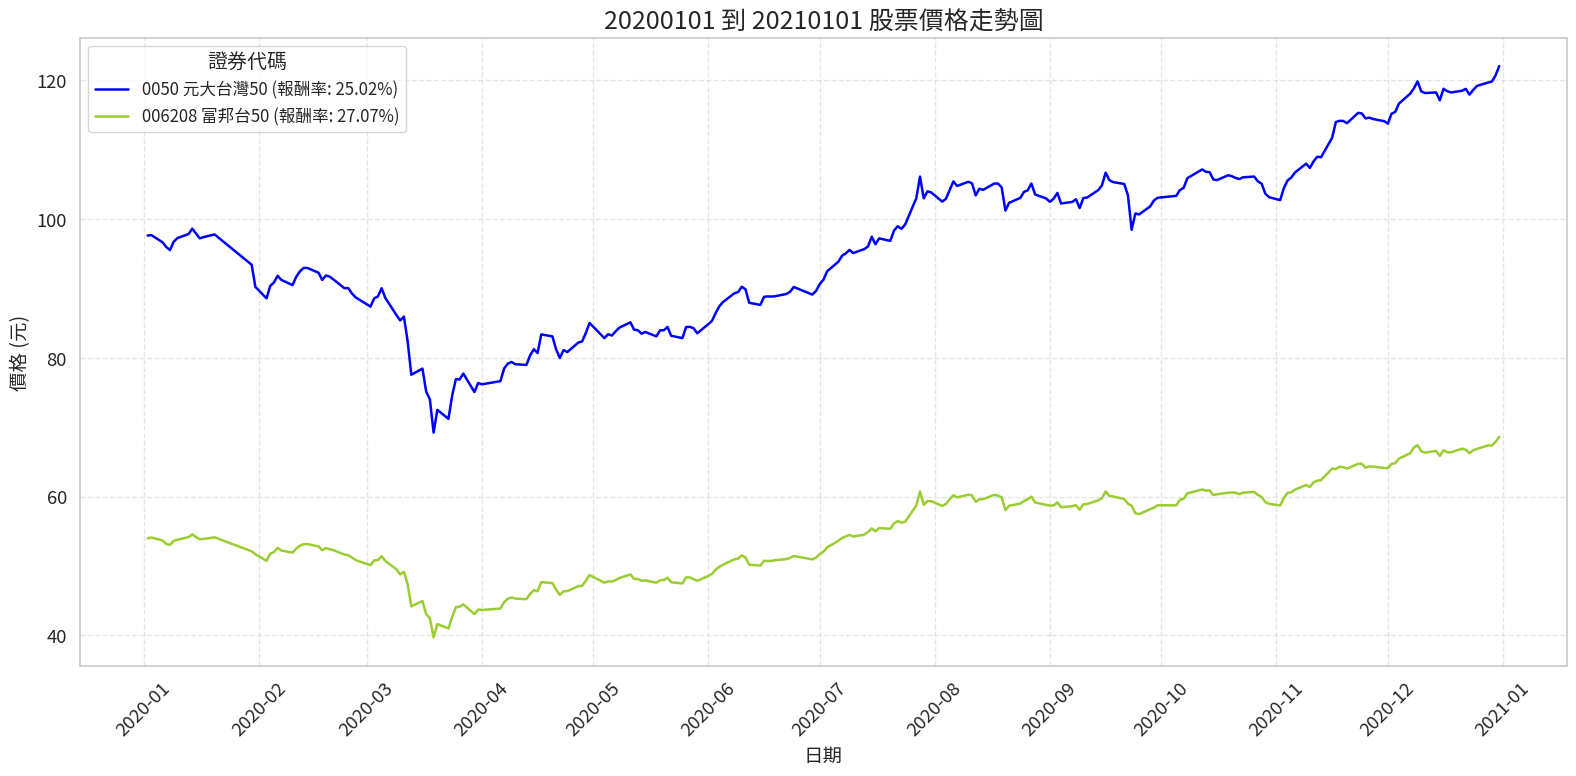

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 確保 '年月日' 欄位是 datetime 格式
filtered_data['年月日'] = pd.to_datetime(filtered_data['年月日'], format='%Y%m%d', errors='coerce')

# 繪製股票價格折線圖
plt.figure(figsize=(16, 8))

# 為每個證券代碼繪製折線圖，並將報酬率顯示於圖例
colors = ['blue', 'yellowgreen', 'gold', 'lightskyblue']

for i, (code, group) in enumerate(filtered_data.groupby('證券代碼')):
    # 從 average_price 中獲取報酬率
    return_rate = average_price.loc[average_price['證券代碼'] == code, '報酬率'].values
    return_label = return_rate[0] if len(return_rate) > 0 else 'N/A'

    # 將報酬率加入圖例標籤
    label_with_return = f"{code} (報酬率: {return_label})"

    plt.plot(group['年月日'], group['當日均價(元)'],
             label=label_with_return,
             color=colors[i % len(colors)],
             linestyle='-',
             linewidth=1.8)

# 設定標題和軸標籤
plt.title(f"{start_date.strftime('%Y%m%d')} 到 {end_date.strftime('%Y%m%d')} 股票價格走勢圖", fontsize=18)
plt.xlabel('日期', fontsize=14)
plt.ylabel('價格 (元)', fontsize=14)

# 美化日期標籤 (x 軸)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 格式化為 年-月
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 每月顯示一次

# 確保 x 軸日期顯示正常
plt.gca().xaxis_date()

# 圖例位置
plt.legend(title='證券代碼', loc='upper left', fontsize=12)

# 旋轉日期標籤
plt.xticks(rotation=45)

# 增加網格線
plt.grid(True, linestyle='--', alpha=0.5)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()
